In [1]:
'''IMPORTABLES'''
%matplotlib inline
from numpy import linalg as LA
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.utils import plot_model
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import Callback, TensorBoard, ModelCheckpoint
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import subplot
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import entropy_estimators as ee

Using TensorFlow backend.


In [2]:
'''CREATING INPUTS'''

m = 100     #sample size
dim = 2        #dim of the input and output space

x_train = [0]*m
for i in range(m):
    x_train[i] = list(np.random.uniform(0,1,dim))
x_train = np.matrix(x_train)

In [3]:
'''CREATING THE TARGET FUNCTION - SETTING COEFFICIENTS'''

a = []   #frequency
b = []   #amplitude   

sum_size = 2       #size of the fourier sum
frq_inf_bound = 10 #lower bound of the interval from which the frequency will be smapled
frq_sup_bound = 20 #upper bound of the interval from which the frequency will be smapled
amp_inf_bound = 10 #lower bound of the interval from which the amplitude will be smapled
amp_sup_bound = 20 #lower bound of the interval from which the amplitude will be smapled

for j in range(dim):          
    a.append(list(np.random.uniform(frq_inf_bound,frq_sup_bound,sum_size)))
    b.append(list(np.random.uniform(amp_inf_bound,amp_sup_bound,sum_size)))  
a = np.matrix(a).T 
b = np.matrix(b) 

In [4]:
'''CREATING THE TARGET FUNCTION '''

y_train = np.matrix([[0 for x in range(dim)] for y in range(m)]) 

for j in range(m):
    for i in range(dim):
        y_train[j,i] = np.dot(b[i,:],np.sin(x_train[j,i]*a[:,i])) #creating the targets, defined as a fourier sum.

C:\Users\Guatimosim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


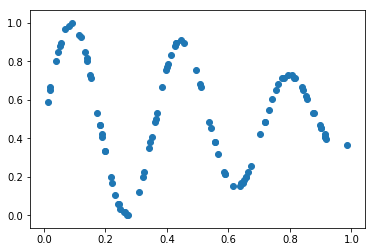

In [ ]:
'''DATA PREPROCESSING'''

noise = 0.1
scaler = MinMaxScaler()
scaled_x_train = np.array(x_train)
scaled_y_train = scaler.fit_transform(y_train) 
#+ np.random.normal(0,noise,(m,dim))
plt.scatter(scaled_x_train[:,0],scaled_y_train[:,0])

In [ ]:
'''SETTING NETWORK'S HYPER PAREMETERS'''

epochs = 1000
batch = 20
n = dim #number of neurons
num_layers = 4

In [ ]:
'''CREATING MODEL'''

model = Sequential()

init = keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None)

model.add(Dense(dim, activation = 'tanh', input_dim = dim))
for i in range(num_layers - 2):
    model.add(Dense(dim, activation = 'tanh', kernel_initializer = init))    
model.add(Dense(dim, activation = 'linear'))
adam = keras.optimizers.Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = adam, loss ='mean_absolute_error')

In [ ]:
'''CALLBACK'''
 
dict_weights = {i: [] for i in range(num_layers)}
dict_outputs = {i: [] for i in range(num_layers)} 

checkpoint = keras.callbacks.ModelCheckpoint(filepath = 'C:/Users/Guatimosim/Dropbox/Mestrado/Pesquisa/Experimento/Checkpoint/weights.{epoch:02d}-{loss:.4f}.hdf5',
                                monitor='loss',
                                verbose=0,
                                save_best_only=True, 
                                save_weights_only=False,
                                mode='auto', 
                                period=10)

class SavingWeightsOutputs(keras.callbacks.Callback): 
    def on_epoch_end(self, batch, logs={}):            
        for j in range(num_layers):
            dict_weights[j].append(model.layers[j].get_weights()[0])
            dict_outputs[j].append(K.function([model.input],[model.layers[j].output])([scaled_x_train]))            

history = SavingWeightsOutputs()

In [ ]:
'''FITTING'''

h = model.fit(x = scaled_x_train,
                    y = scaled_y_train,
                    batch_size = batch,
                    epochs = epochs,  
                    callbacks = [history,checkpoint],
                    shuffle = False
                    )
model.summary()

Epoch 1/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.3629
Epoch 2/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2887
Epoch 3/1000
100/100 [==============================] - 0s 120us/step - loss: 0.2590
Epoch 4/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2625
Epoch 5/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2577
Epoch 6/1000
100/100 [==============================] - 0s 110us/step - loss: 0.2558
Epoch 7/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2535
Epoch 8/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2544
Epoch 9/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2536
Epoch 10/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2522
Epoch 11/1000
100/100 [==============================] - 0s 110us/step - loss: 0.2526
Epoch 12/1000
100/100 [==============================] - 0s 70us/step - 

100/100 [==============================] - 0s 70us/step - loss: 0.2403
Epoch 98/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2378
Epoch 99/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2407
Epoch 100/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2385
Epoch 101/1000
100/100 [==============================] - 0s 210us/step - loss: 0.2380
Epoch 102/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2438
Epoch 103/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2363
Epoch 104/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2413
Epoch 105/1000
100/100 [==============================] - 0s 87us/step - loss: 0.2392
Epoch 106/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2374
Epoch 107/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2410
Epoch 108/1000
100/100 [==============================] - 0s 60us/step

100/100 [==============================] - 0s 140us/step - loss: 0.2325
Epoch 193/1000
100/100 [==============================] - 0s 100us/step - loss: 0.2335
Epoch 194/1000
100/100 [==============================] - 0s 110us/step - loss: 0.2329
Epoch 195/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2331
Epoch 196/1000
100/100 [==============================] - 0s 100us/step - loss: 0.2319
Epoch 197/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2329
Epoch 198/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2329
Epoch 199/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2333
Epoch 200/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2322
Epoch 201/1000
100/100 [==============================] - 0s 150us/step - loss: 0.2319
Epoch 202/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2322
Epoch 203/1000
100/100 [==============================] - 0s 60u

100/100 [==============================] - 0s 80us/step - loss: 0.2243
Epoch 288/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2241
Epoch 289/1000
100/100 [==============================] - 0s 100us/step - loss: 0.2226
Epoch 290/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2250
Epoch 291/1000
100/100 [==============================] - 0s 130us/step - loss: 0.2253
Epoch 292/1000
100/100 [==============================] - 0s 100us/step - loss: 0.2203
Epoch 293/1000
100/100 [==============================] - 0s 110us/step - loss: 0.2240
Epoch 294/1000
100/100 [==============================] - 0s 100us/step - loss: 0.2249
Epoch 295/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2225
Epoch 296/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2214
Epoch 297/1000
100/100 [==============================] - 0s 100us/step - loss: 0.2220
Epoch 298/1000
100/100 [==============================] - 0s 90

100/100 [==============================] - 0s 110us/step - loss: 0.2182
Epoch 383/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2154
Epoch 384/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2171
Epoch 385/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2168
Epoch 386/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2175
Epoch 387/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2152
Epoch 388/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2173
Epoch 389/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2181
Epoch 390/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2146
Epoch 391/1000
100/100 [==============================] - 0s 160us/step - loss: 0.2166
Epoch 392/1000
100/100 [==============================] - 0s 170us/step - loss: 0.2169
Epoch 393/1000
100/100 [==============================] - 0s 100us

100/100 [==============================] - 0s 72us/step - loss: 0.2136
Epoch 478/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2154
Epoch 479/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2173
Epoch 480/1000
100/100 [==============================] - 0s 60us/step - loss: 0.2135
Epoch 481/1000
100/100 [==============================] - 0s 110us/step - loss: 0.2158
Epoch 482/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2154
Epoch 483/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2149
Epoch 484/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2145
Epoch 485/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2140
Epoch 486/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2151
Epoch 487/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2135
Epoch 488/1000
100/100 [==============================] - 0s 70us/st

100/100 [==============================] - 0s 80us/step - loss: 0.2154
Epoch 573/1000
100/100 [==============================] - 0s 120us/step - loss: 0.2132
Epoch 574/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2139
Epoch 575/1000
100/100 [==============================] - 0s 110us/step - loss: 0.2135
Epoch 576/1000
100/100 [==============================] - 0s 110us/step - loss: 0.2168
Epoch 577/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2152
Epoch 578/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2135
Epoch 579/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2152
Epoch 580/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2139
Epoch 581/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2146
Epoch 582/1000
100/100 [==============================] - 0s 80us/step - loss: 0.2154
Epoch 583/1000
100/100 [==============================] - 0s 70us/

100/100 [==============================] - 0s 90us/step - loss: 0.2142
Epoch 668/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2138
Epoch 669/1000
100/100 [==============================] - 0s 120us/step - loss: 0.2139
Epoch 670/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2117
Epoch 671/1000
100/100 [==============================] - 0s 100us/step - loss: 0.2145
Epoch 672/1000
100/100 [==============================] - 0s 100us/step - loss: 0.2118
Epoch 673/1000
100/100 [==============================] - 0s 160us/step - loss: 0.2150
Epoch 674/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2141
Epoch 675/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2147
Epoch 676/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2125
Epoch 677/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2121
Epoch 678/1000
100/100 [==============================] - 0s 90us

100/100 [==============================] - 0s 70us/step - loss: 0.2140
Epoch 763/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2117
Epoch 764/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2163
Epoch 765/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2134
Epoch 766/1000
100/100 [==============================] - 0s 60us/step - loss: 0.2144
Epoch 767/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2148
Epoch 768/1000
100/100 [==============================] - 0s 60us/step - loss: 0.2135
Epoch 769/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2167
Epoch 770/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2137
Epoch 771/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2120
Epoch 772/1000
100/100 [==============================] - 0s 70us/step - loss: 0.2144
Epoch 773/1000
100/100 [==============================] - 0s 70us/ste

In [ ]:
from keras.models import load_model
model = load_model('C:/Users/Guatimosim/Dropbox/Mestrado/Pesquisa/Experimento/Checkpoint/weights.1840-0.2288.hdf5')

In [ ]:
plt.scatter(scaled_x_train[:,1],scaled_y_train[:,1])
plt.scatter(scaled_x_train[:,1],model.predict(scaled_x_train)[:,1])

In [ ]:
dict_spectral_norm = {i:[0]*epochs for i in range(num_layers)}

for i in range(num_layers):
    for j in range(epochs):
        dict_spectral_norm[i][j] = LA.norm((dict_weights[i])[j], ord = 2)


In [ ]:
from matplotlib.pyplot import figure

for i in range(num_layers):
    plt.plot(range(epochs), dict_spectral_norm[i], label = 'layer %s' %(i+1))
plt.title('Spectral norm Evolution')
plt.xlabel('epochs')
plt.ylabel('spectral norm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

In [ ]:
dict_spectral_norm = {i:[0]*epochs for i in range(num_layers)}

for i in range(num_layers):
    for j in range(epochs):
        dict_spectral_norm[i][j] = LA.norm((dict_weights[i])[j], ord = -2)


In [ ]:
from matplotlib.pyplot import figure

for i in range(num_layers):
    plt.plot(range(epochs), dict_spectral_norm[i], label = 'layer %s' %(i+1))
plt.title('Smalled Singular Value Evolution')
plt.xlabel('epochs')
plt.ylabel('Smalled Singular Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

In [ ]:
t = 10 #steps in epochs
dict_mi_x= {i:[0]*epochs for i in range(num_layers)}
dict_mi_y= {i:[0]*epochs for i in range(num_layers)}

for i in range(num_layers):
    for j in range(epochs):
        dict_mi_x[i][j] = ee.mi(scaled_x_train, np.array(dict_outputs[i][j]).reshape(m,dim))
        dict_mi_y[i][j] = ee.mi(scaled_y_train, np.array(dict_outputs[i][j]).reshape(m,dim))

In [ ]:
axi = subplot()


for i in range(num_layers):
    fig = plt.scatter(dict_mi_x[i],dict_mi_y[i], c= np.arange(epochs), label = 'layer %s' %(i+1), cmap=plt.cm.BuPu_r)
    plt.title('Information Plane')
    plt.xlabel('I(X,T)')
    plt.ylabel('I(T,Y)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)


In [ ]:
plt.plot(h.history['loss'])

In [ ]:
model.save_weights("C:/Users/Guatimosim/Dropbox/Mestrado/Pesquisa/Experimento/Logs_1/")